In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
!pip install -U scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
!pip install category_encoders
!pip install wandb
!pip install onnx
!pip install skl2onnx
!pip install onnxruntime
!pip install onnxmltools!pip install category_encoders
!pip install wandb
!pip install onnx
!pip install skl2onnx
!pip install onnxruntime
!pip install onnxmltools

ERROR: Invalid requirement: 'onnxmltools!pip'


In [ ]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import wandb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer
import onnxruntime as rt
from skl2onnx import convert_sklearn, __version__, update_registered_converter
from skl2onnx.common.data_types import FloatTensorType, StringTensorType
from skl2onnx.common.data_types import Int64TensorType
from skl2onnx.common.shape_calculator import calculate_linear_classifier_output_shapes
from onnxmltools.convert.xgboost.operator_converters.XGBoost import convert_xgboost  # noqa
import pprint

import wandb
import os

warnings.filterwarnings("ignore")

In [ ]:
os.environ["WANDB_API_KEY"] = "9b24652fd248c5ffcab3d4a54eca3edd254b97bb"

In [ ]:
import sklearn
sklearn.__version__





'1.0.1'

In [ ]:
import datetime

date_object = datetime.date.today()
date_object

datetime.date(2021, 12, 7)

Loading the dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rajap20/streamlit-example/master/data_final.csv')

In [ ]:
df.head(5)

,Customer_id,Date_disb,pay_type,area_code,pin_code,state,dealer,product_code,tenure,roi,emi,proc_fee,asset_cost,loan_amt,gender,qualification,employ_type,resid_type,age,cibil_score,net_salary,net_irr,fraud
0,0,2/13/2020,ACH,3075,530041,AP,DEALER,SC,0.470588,-0.793282,0.124252,-0.093758,87000,71000,M,OTHERS,SAL,O,0.306122,-0.906781,0.158169,-1.321153,0
1,1,06-02-2020,ADM,3075,532123,AP,DEALER,SC,0.352941,-0.952045,0.083863,-0.572295,61500,51000,F,PG,SAL,O,0.551020,0.163204,1.161336,-1.308269,0
2,2,10-02-2020,ADM,3075,533218,AP,ASC,SC,0.352941,0.318061,0.210079,0.913555,87000,74038,M,SSC,SEP,O,0.530612,NaN,0.910545,0.605033,0
3,3,10-02-2020,ADM,3075,532484,AP,DEALER,SC,0.352941,-1.309262,0.166511,0.649593,84000,69720,M,OTHERS,AGR,O,0.224490,-0.167982,-0.544048,-1.098901,0
4,4,10-02-2020,ADM,3075,530046,AP,DEALER,SC,0.352941,-0.713900,0.092091,-0.572295,61500,52220,F,HSC,SAL,O,0.224490,NaN,-0.343415,-0.986164,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11702 entries, 0 to 11701
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_id    11702 non-null  int64  
 1   Date_disb      11702 non-null  object 
 2   pay_type       11702 non-null  object 
 3   area_code      11702 non-null  int64  
 4   pin_code       11702 non-null  int64  
 5   state          11702 non-null  object 
 6   dealer         11702 non-null  object 
 7   product_code   11702 non-null  object 
 8   tenure         11702 non-null  float64
 9   roi            11702 non-null  float64
 10  emi            11702 non-null  float64
 11  proc_fee       11702 non-null  float64
 12  asset_cost     11702 non-null  int64  
 13  loan_amt       11702 non-null  int64  
 14  gender         11698 non-null  object 
 15  qualification  11698 non-null  object 
 16  employ_type    11698 non-null  object 
 17  resid_type     11698 non-null  object 
 18  age   

In [ ]:
df = df.drop(['pin_code'], axis = 1)
df.columns

Index(['Customer_id', 'Date_disb', 'pay_type', 'area_code', 'state', 'dealer',
       'product_code', 'tenure', 'roi', 'emi', 'proc_fee', 'asset_cost',
       'loan_amt', 'gender', 'qualification', 'employ_type', 'resid_type',
       'age', 'cibil_score', 'net_salary', 'net_irr', 'fraud'],
      dtype='object')

Feature Set Selection

In [ ]:
df.columns

Index(['Customer_id', 'Date_disb', 'pay_type', 'area_code', 'state', 'dealer',
       'product_code', 'tenure', 'roi', 'emi', 'proc_fee', 'asset_cost',
       'loan_amt', 'gender', 'qualification', 'employ_type', 'resid_type',
       'age', 'cibil_score', 'net_salary', 'net_irr', 'fraud'],
      dtype='object')

In [ ]:
x_features = [
              'area_code', 
              'state', 'resid_type', 'net_irr', 'proc_fee',
       'asset_cost', 'loan_amt', 'emi', 'net_salary', 'roi', 'tenure',
       'age']

In [ ]:
cat_features = [
                'area_code', 
                'state', 'resid_type']

In [ ]:
num_features = list(set(x_features) - set(cat_features))
num_features

['net_irr',
 'emi',
 'roi',
 'proc_fee',
 'asset_cost',
 'tenure',
 'age',
 'loan_amt',
 'net_salary']

In [ ]:
df[x_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11702 entries, 0 to 11701
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_code   11702 non-null  int64  
 1   state       11702 non-null  object 
 2   resid_type  11698 non-null  object 
 3   net_irr     11702 non-null  float64
 4   proc_fee    11702 non-null  float64
 5   asset_cost  11702 non-null  int64  
 6   loan_amt    11702 non-null  int64  
 7   emi         11702 non-null  float64
 8   net_salary  11702 non-null  float64
 9   roi         11702 non-null  float64
 10  tenure      11702 non-null  float64
 11  age         11698 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 1.1+ MB


In [ ]:
df[cat_features] = df[cat_features].astype(object)
df[x_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11702 entries, 0 to 11701
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_code   11702 non-null  object 
 1   state       11702 non-null  object 
 2   resid_type  11698 non-null  object 
 3   net_irr     11702 non-null  float64
 4   proc_fee    11702 non-null  float64
 5   asset_cost  11702 non-null  int64  
 6   loan_amt    11702 non-null  int64  
 7   emi         11702 non-null  float64
 8   net_salary  11702 non-null  float64
 9   roi         11702 non-null  float64
 10  tenure      11702 non-null  float64
 11  age         11698 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 1.1+ MB


In [ ]:
df

,Customer_id,Date_disb,pay_type,area_code,state,dealer,product_code,tenure,roi,emi,proc_fee,asset_cost,loan_amt,gender,qualification,employ_type,resid_type,age,cibil_score,net_salary,net_irr,fraud
0,0,2/13/2020,ACH,3075,AP,DEALER,SC,0.470588,-0.793282,0.124252,-0.093758,87000,71000,M,OTHERS,SAL,O,0.306122,-0.906781,0.158169,-1.321153,0
1,1,06-02-2020,ADM,3075,AP,DEALER,SC,0.352941,-0.952045,0.083863,-0.572295,61500,51000,F,PG,SAL,O,0.551020,0.163204,1.161336,-1.308269,0
2,2,10-02-2020,ADM,3075,AP,ASC,SC,0.352941,0.318061,0.210079,0.913555,87000,74038,M,SSC,SEP,O,0.530612,NaN,0.910545,0.605033,0
3,3,10-02-2020,ADM,3075,AP,DEALER,SC,0.352941,-1.309262,0.166511,0.649593,84000,69720,M,OTHERS,AGR,O,0.224490,-0.167982,-0.544048,-1.098901,0
4,4,10-02-2020,ADM,3075,AP,DEALER,SC,0.352941,-0.713900,0.092091,-0.572295,61500,52220,F,HSC,SAL,O,0.224490,NaN,-0.343415,-0.986164,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11697,11697,2/28/2021,ADM,3052,UP,DEALER,MC,0.470588,0.476825,0.258508,1.427003,124300,98900,M,SSC,SEP,O,0.122449,-0.448216,-0.243098,0.231391,0
11698,11698,2/28/2021,ACH,3052,UP,ASC,MC,0.588235,0.631619,0.235976,1.740351,136643,105900,M,OTHERS,SEP,O,0.285714,NaN,0.910545,0.279707,0
11699,11699,2/28/2021,ACH,3052,UP,ASC,MC,0.352941,-1.352922,0.088631,0.586583,61651,52900,M,HSC,SEP,O,0.306122,NaN,0.057852,0.141202,0
11700,11700,09-02-2021,ACH,3074,UP,ASC,MC,0.470588,0.834042,0.219147,0.978268,129300,88000,M,OTHERS,SEP,O,0.306122,NaN,-0.092623,0.685559,0


#### Defining Functions

In [ ]:
def prepare_data(X,
                 y,
#                 num_scaler = None,
#                 num_imputer = None,
#                 cat_imputer = None,
                 cat_encoder,
                 num_scaler,
                 num_features,
                 cat_features,
                 train_size = 0.8,
                 seed = 100):
  
  # Split the dataset into train and test split
  x_train, x_test, y_train, y_test = train_test_split(X,
                                                      y,
                                                      train_size = train_size,
                                                      random_state = seed)
  
  
  # encoder the categorical features
  cat_encoder.fit(X=x_train, y=y_train)
  x_train_encoded = cat_encoder.transform(x_train)
  x_test_encoded = cat_encoder.transform(x_test)

  # scaling numeric features
  num_scaler.fit(x_train[num_features])
  x_train_scaler = num_scaler.transform(x_train[num_features])
  x_test_scaler = num_scaler.transform(x_test[num_features])

  return x_train_encoded, x_test_encoded, y_train, y_test



def prepare_data_SMOTE(X,
                 y,
#                 num_imputer = None,
#                 cat_imputer = None,
                 cat_encoder,
                 num_scaler,
                 num_features,
                 cat_features,
                 train_size = 0.8,
                 seed = 100):
  
  # Split the dataset into train and test split
  x_train, x_test, y_train, y_test = train_test_split(X,
                                                      y,
                                                      train_size = train_size,
                                                      random_state = seed)
  
  oversample = SMOTENC(categorical_features=cat_features, random_state=seed)
  x_train_sm, y_train_sm = oversample.fit_resample(x_train, y_train) 
  
  # encoder the categorical features
  cat_encoder.fit(X=x_train_sm, y=y_train_sm)
  x_train_encoded = cat_encoder.transform(x_train_sm)
  x_test_encoded = cat_encoder.transform(x_test)

  """oversample = SMOTE()
  x_train_sm, y_train_sm = oversample.fit_resample(x_train_encoded, y_train)

  return x_train_sm, x_test_encoded, y_train_sm, y_test"""

  return x_train_encoded, x_test_encoded, y_train_sm, y_test
  

In [ ]:
def get_total_cost( actual, predicted, cost_TNs, cost_FNs ):
    # Get the confusion matrix and calculate cost
    tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
    return tn * cost_TNs + fn * cost_FNs

def run_model_experiment(model,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         labels,
                         name,
                         config = None,
                         tags = None):
  
  
  model.fit(x_train, y_train)

  wandb.init(project='mlops', config=config, tags = tags)
  wandb.run.name = name

  test_df=pd.DataFrame({
                      "y_test":y_test,
                       "y_prob":model.predict_proba(x_test)[:,1]
                      })
  cost_df = pd.DataFrame( columns = ['prob', 'cost'])
  idx = 0
  cost_FPs = 350
  cost_TPs = -84

  ## Iterate cut-off probability values between 0.1 and 0.5
  for each_prob in range(0,100):
    cost = get_total_cost(test_df.y_test, test_df.y_prob.map(lambda x: 1 if x > (each_prob/100) else 0), cost_TPs, cost_FPs)
    cost_df.loc[idx] = [(each_prob/100), cost]
    idx += 1

  cost_df = cost_df.sort_values( 'cost', ascending = True )
  min_cost = cost_df.iloc[0,1]
  cutoff_prob = cost_df.iloc[0,0]

  test_df['y_pred'] = test_df.y_prob.map(lambda x: 1 if x > cutoff_prob else 0)

  

  clasf_matrix = confusion_matrix(test_df.y_test, test_df.y_pred)
  sensitivity = [round(clasf_matrix[1,1]/(clasf_matrix[1,1]+clasf_matrix[1,0]),4)]
  specificity = [round(clasf_matrix[0,0]/(clasf_matrix[0,1]+clasf_matrix[0,0]),4)]
  precision = [round(clasf_matrix[1,1]/(clasf_matrix[1,1]+clasf_matrix[0,1]),4)]
  accuracy = [round((clasf_matrix[1,1]+clasf_matrix[0,0])/(clasf_matrix[1,1]+clasf_matrix[1,0]+clasf_matrix[0,1]+clasf_matrix[0,0]),4)]
  F_Score = [round(2*(clasf_matrix[1,1]/(clasf_matrix[1,1]+clasf_matrix[0,1]))*(clasf_matrix[1,1]/(clasf_matrix[1,1]+clasf_matrix[1,0]))/((clasf_matrix[1,1]/(clasf_matrix[1,1]+clasf_matrix[0,1])) + (clasf_matrix[1,1]/(clasf_matrix[1,1]+clasf_matrix[1,0]))), 4)]
  cost = min_cost

  print(clasf_matrix)

  wandb.log( {
      "sensitivity" : sensitivity, 
      "specificity": specificity,
      "precision" : precision,
      "accuracy" : accuracy,
      "F_Score" : F_Score,
      "cost" : cost})
  
  y_probas = test_df["y_prob"]
  
  
  """wandb.sklearn.plot_classifier(model, 
                               x_train, 
                               x_test, 
                               y_train, 
                               y_test,
                               y_probas,
                               lables,  
                               model_name=name,
                              feature_names=None)"""
  
  wandb.Artifact(name, 
                 type = 'model',
                 description = config)

  wandb.save()
  wandb.finish()

  return model, cutoff_prob

In [ ]:
from category_encoders import OneHotEncoder, TargetEncoder


ohe_encoder = OneHotEncoder(cols = cat_features,
                            use_cat_names = True)


target_encoder = TargetEncoder(cols = cat_features)


std_scaler = StandardScaler()


In [ ]:
lables = [0,1]

### Splitting into Dev and Prod dataset 

In [ ]:
df_dev, df_prod = train_test_split(df,
                                             train_size = 0.8,
                                             random_state = 42)

In [ ]:
df_prod = df_prod.reset_index()
df_dev = df_dev.reset_index()

In [ ]:
df_prod

,index,Customer_id,Date_disb,pay_type,area_code,state,dealer,product_code,tenure,roi,emi,proc_fee,asset_cost,loan_amt,gender,qualification,employ_type,resid_type,age,cibil_score,net_salary,net_irr,fraud
0,10222,10222,06-02-2021,ADM,3072,AS,DEALER,MC,0.352941,-0.162198,0.102562,-1.726064,127070,53223,M,HSC,SEP,O,0.346939,NaN,0.158169,-0.480460,0
1,8149,8149,10/22/2020,ENCH,3087,TR,ASC,MC,0.588235,-0.753591,0.116212,1.127279,134649,79273,M,OTHERS,SEP,O,0.183673,NaN,0.007694,-1.066690,0
2,5519,5519,03-08-2020,ENCH,3018,MH,ASC,SC,0.352941,0.337907,0.180067,-1.726064,82686,67900,M,OTHERS,SEP,R,0.224490,-0.269885,0.158169,-0.461134,1
3,379,379,12/26/2019,ADM,3068,BR,DEALER,MC,0.431373,-1.249726,0.089379,0.402661,66552,52836,M,HSC,SEP,O,0.122449,NaN,0.258486,-0.387050,1
4,11164,11164,11/29/2020,ADM,3052,UP,ASC,SC,0.470588,-1.130654,0.114342,0.608721,81953,69650,M,UG,SEP,O,0.244898,NaN,0.183248,-1.263174,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,8542,8542,11/30/2020,ACH,3021,AP,ASC,MO,0.352941,0.417289,0.097607,-0.006906,64000,51000,M,OTHERS,AGR,O,0.551020,NaN,-0.092623,0.543833,0
2337,8409,8409,10-10-2020,ADM,3054,WB,ASC,SC,0.372549,-0.753591,0.098448,-0.780910,98285,55500,M,UG,SAL,O,0.551020,-0.677499,0.760070,-0.696270,1
2338,76,76,03-02-2020,ACH,3047,HA,DEALER,SC,0.352941,0.357752,0.147251,0.360086,73678,61188,M,OTHERS,SAL,O,0.163265,-1.059636,-0.443731,0.646906,0
2339,7460,7460,9/14/2020,DRE,3008,TN,ASC,SC,0.352941,1.191260,0.146597,-0.363680,85460,59084,M,UG,SEP,O,0.387755,NaN,-0.343415,1.146168,0


In [ ]:
X = df_dev[x_features]
y = df_dev['fraud']

#### XGBoost with one hot encoding 

In [ ]:
x_train, x_test, y_train, y_test = prepare_data(X,
                                                y,
                                                cat_encoder = ohe_encoder,
                                                num_scaler = std_scaler,
                                                num_features = num_features,
                                                cat_features = cat_features)

params = { 
          "n_estimators": 301,
          "learning_rate": 0.1 ,
          "max_depth": 20,
          "min_child_weight": 7,
          "gamma": 0.1,
          "colsample_bytree" : 0.7
          }

from xgboost import XGBClassifier

xgb_model_ohe = XGBClassifier(**params) 

xgb_model_ohe, xgb_model_ohe_cutoff = run_model_experiment(xgb_model_ohe,
                                   x_train,
                                   y_train,
                                   x_test,
                                   y_test,
                                   lables,
                                   name = 'XGBoostWithOHE',
                                   tags = ['XGBoost', 'experiment', 'OheEncoder'])

wandb: Currently logged in as: madhur1 (use `wandb login --relogin` to force relogin)


wandb: WARNING Calling run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


[[1712   31]
 [ 117   13]]


cost,▁
cost,-102858.0


In [ ]:
x_train.shape

(7488, 106)

In [ ]:
x_train[0:10]

,area_code_3022.0,area_code_3045.0,area_code_3000.0,area_code_3001.0,area_code_3042.0,area_code_3021.0,area_code_3020.0,area_code_3078.0,area_code_3047.0,area_code_3007.0,area_code_3016.0,area_code_3110.0,area_code_3054.0,area_code_3041.0,area_code_3036.0,area_code_3018.0,area_code_3026.0,area_code_3052.0,area_code_3005.0,area_code_3037.0,area_code_3068.0,area_code_3025.0,area_code_3029.0,area_code_3008.0,area_code_3009.0,area_code_3089.0,area_code_3072.0,area_code_3051.0,area_code_3044.0,area_code_3058.0,area_code_3004.0,area_code_3039.0,area_code_3087.0,area_code_3111.0,area_code_3011.0,area_code_3038.0,area_code_3028.0,area_code_3003.0,area_code_3060.0,area_code_3091.0,...,area_code_3030.0,area_code_3090.0,state_KL,state_DL,state_TN,state_AP,state_WB,state_HA,state_RJ,state_KA,state_UP,state_MH,state_GJ,state_BR,state_PB,state_AS,state_OR,state_PY,state_TR,state_MP,state_CH,state_UC,state_CG,state_JH,state_HP,state_MN,state_JK,resid_type_O,resid_type_R,resid_type_L,resid_type_nan,net_irr,proc_fee,asset_cost,loan_amt,emi,net_salary,roi,tenure,age
7286,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.096107,-1.726064,96264,81274,0.152861,-0.092623,1.111878,0.588235,0.653061
5777,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.617917,0.274937,74500,61600,0.151739,-0.544048,0.556206,0.352941,0.510204
2298,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.673723,-1.726064,69785,56800,0.195587,-0.343415,0.020380,0.235294,0.591837
8973,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.931406,-0.193382,74299,64618,0.102468,-0.443731,-0.535291,0.568627,0.204082
4484,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.530948,0.722821,84940,70348,0.140894,-0.343415,0.595897,0.470588,0.428571
3192,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.245324,0.402661,58284,50000,0.048055,-0.443731,-0.158228,0.568627,0.734694
8989,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.402107,0.487810,79000,64400,0.163145,-0.443731,0.357752,0.352941,0.183673
6062,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.485854,0.147214,63000,50200,0.092277,0.158169,0.278371,0.352941,0.673469
3391,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.769306,-1.123209,78400,60200,0.150337,-0.293256,1.032496,0.529412,0.387755
3830,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.580312,-1.726064,76823,60500,0.066006,-0.092623,0.417289,0.588235,0.326531


In [ ]:
temp2 = pd.DataFrame({
                    "y_train":y_train,
                    "y_prob":xgb_model_ohe.predict_proba(x_train)[:,1]
                    })

temp2['prediction']= temp2.y_prob.map(lambda x: 1 if x > xgb_model_ohe_cutoff else 0)
temp2

,y_train,y_prob,prediction
7286,0,0.012233,0
5777,0,0.024892,0
2298,1,0.675667,1
8973,0,0.016400,0
4484,0,0.001867,0
...,...,...,...
350,0,0.001773,0
79,0,0.010536,0
8039,0,0.001444,0
6936,0,0.025573,0


In [ ]:
temp1 = pd.DataFrame({
                    "y_test":y_test,
                      "y_prob":xgb_model_ohe.predict_proba(x_test)[:,1]
                    })

temp1['predictions']= temp1.y_prob.map(lambda x: 1 if x > xgb_model_ohe_cutoff else 0)

In [ ]:
x_train

,area_code_3022.0,area_code_3045.0,area_code_3000.0,area_code_3001.0,area_code_3042.0,area_code_3021.0,area_code_3020.0,area_code_3078.0,area_code_3047.0,area_code_3007.0,area_code_3016.0,area_code_3110.0,area_code_3054.0,area_code_3041.0,area_code_3036.0,area_code_3018.0,area_code_3026.0,area_code_3052.0,area_code_3005.0,area_code_3037.0,area_code_3068.0,area_code_3025.0,area_code_3029.0,area_code_3008.0,area_code_3009.0,area_code_3089.0,area_code_3072.0,area_code_3051.0,area_code_3044.0,area_code_3058.0,area_code_3004.0,area_code_3039.0,area_code_3087.0,area_code_3111.0,area_code_3011.0,area_code_3038.0,area_code_3028.0,area_code_3003.0,area_code_3060.0,area_code_3091.0,...,area_code_3030.0,area_code_3090.0,state_KL,state_DL,state_TN,state_AP,state_WB,state_HA,state_RJ,state_KA,state_UP,state_MH,state_GJ,state_BR,state_PB,state_AS,state_OR,state_PY,state_TR,state_MP,state_CH,state_UC,state_CG,state_JH,state_HP,state_MN,state_JK,resid_type_O,resid_type_R,resid_type_L,resid_type_nan,net_irr,proc_fee,asset_cost,loan_amt,emi,net_salary,roi,tenure,age
7286,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.096107,-1.726064,96264,81274,0.152861,-0.092623,1.111878,0.588235,0.653061
5777,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.617917,0.274937,74500,61600,0.151739,-0.544048,0.556206,0.352941,0.510204
2298,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.673723,-1.726064,69785,56800,0.195587,-0.343415,0.020380,0.235294,0.591837
8973,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.931406,-0.193382,74299,64618,0.102468,-0.443731,-0.535291,0.568627,0.204082
4484,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.530948,0.722821,84940,70348,0.140894,-0.343415,0.595897,0.470588,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.569601,0.232363,69700,56999,0.125748,-0.092623,0.278371,0.352941,0.142857
79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.695491,0.057807,67900,56000,0.140613,-0.418652,2.084303,0.352941,0.571429
8039,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.279707,0.880347,89500,73900,0.115183,0.408961,0.437134,0.588235,0.326531
6936,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.499786,-1.726064,79403,63899,0.079188,-0.343415,0.476825,0.588235,0.122449


In [ ]:
temp1

,y_test,y_prob,predictions
343,0,0.001217,0
155,0,0.013352,0
5340,0,0.001174,0
3327,0,0.222712,0
1519,0,0.078459,0
...,...,...,...
1965,0,0.044256,0
6960,0,0.010215,0
6640,0,0.010064,0
7842,0,0.009764,0


Accuracy

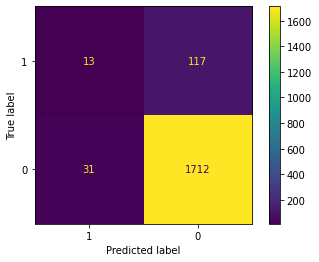

In [ ]:
y_test.value_counts()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(temp1['y_test'], temp1['predictions'], labels=[1,0])
ConfusionMatrixDisplay(cm, display_labels = ['1', '0']).plot();

In [ ]:
!pip install evidently
!pip install pyyaml==5.4.1



Encoding  Production dataset

In [ ]:
X_p = df_prod[x_features]
y_p = df_prod['fraud']

In [ ]:
x_p_train, x_p_test, y_p_train, y_p_test = prepare_data(X_p,
                                                y_p,
                                                cat_encoder = ohe_encoder,
                                                num_scaler = std_scaler,
                                                num_features = num_features,
                                                cat_features = cat_features)

params = { 
          "n_estimators": 301,
          "learning_rate": 0.1 ,
          "max_depth": 20,
          "min_child_weight": 7,
          "gamma": 0.1,
          "colsample_bytree" : 0.7
          }

from xgboost import XGBClassifier

xgb_model_ohe = XGBClassifier(**params) 

xgb_model_ohe, xgb_model_ohe_cutoff = run_model_experiment(xgb_model_ohe,
                                   x_p_train,
                                   y_p_train,
                                   x_p_test,
                                   y_p_test,
                                   lables,
                                   name = 'XGBoostWithOHE',
                                   tags = ['XGBoost', 'experiment', 'OheEncoder'])

wandb: WARNING Calling run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


[[428   3]
 [ 36   2]]


cost,▁
cost,-23352.0


In [ ]:
x_features = list( x_p_train.columns )

In [ ]:

frames = [x_p_train, x_p_test]
result = pd.concat(frames)
df_prod=result

frames2 = [y_p_train, y_p_test]
result2 = pd.concat(frames2)

prod_fraud= result2 
len(prod_fraud)
len(df_prod)


2341

In [ ]:
x_features = list( df_prod.columns )
x_features

['area_code_3045.0',
 'area_code_3007.0',
 'area_code_3012.0',
 'area_code_3024.0',
 'area_code_3022.0',
 'area_code_3078.0',
 'area_code_3016.0',
 'area_code_3009.0',
 'area_code_3091.0',
 'area_code_3039.0',
 'area_code_3006.0',
 'area_code_3001.0',
 'area_code_3054.0',
 'area_code_3061.0',
 'area_code_3072.0',
 'area_code_3020.0',
 'area_code_3068.0',
 'area_code_3088.0',
 'area_code_3053.0',
 'area_code_3075.0',
 'area_code_3021.0',
 'area_code_3031.0',
 'area_code_3025.0',
 'area_code_3046.0',
 'area_code_3047.0',
 'area_code_3064.0',
 'area_code_3049.0',
 'area_code_3051.0',
 'area_code_3005.0',
 'area_code_3087.0',
 'area_code_3052.0',
 'area_code_3019.0',
 'area_code_3037.0',
 'area_code_3028.0',
 'area_code_3018.0',
 'area_code_3004.0',
 'area_code_3008.0',
 'area_code_3044.0',
 'area_code_3000.0',
 'area_code_3036.0',
 'area_code_3111.0',
 'area_code_3029.0',
 'area_code_3003.0',
 'area_code_3011.0',
 'area_code_3060.0',
 'area_code_3035.0',
 'area_code_3033.0',
 'area_code_3

In [ ]:
temp1 = pd.DataFrame({
                    "y_test":prod_fraud,
                      "y_prob":xgb_model_ohe.predict_proba(df_prod[x_features])[:,1]
                    })

df_prod['prediction']= temp1.y_prob.map(lambda x: 1 if x > xgb_model_ohe_cutoff else 0)

In [ ]:
new_cat_features = list(set(x_features) - set(num_features))
new_cat_features

['state_CH',
 'state_TR',
 'area_code_3044.0',
 'resid_type_L',
 'area_code_3034.0',
 'area_code_3049.0',
 'area_code_3015.0',
 'area_code_3000.0',
 'state_AP',
 'area_code_3001.0',
 'area_code_3028.0',
 'state_WB',
 'area_code_3053.0',
 'area_code_3014.0',
 'area_code_3004.0',
 'area_code_3078.0',
 'state_UP',
 'area_code_3021.0',
 'resid_type_O',
 'state_PB',
 'area_code_3033.0',
 'area_code_3058.0',
 'area_code_3012.0',
 'area_code_3091.0',
 'state_PY',
 'state_UC',
 'area_code_3032.0',
 'state_JH',
 'state_CG',
 'area_code_3046.0',
 'state_TN',
 'state_KA',
 'area_code_3045.0',
 'area_code_3022.0',
 'state_KL',
 'resid_type_R',
 'area_code_3035.0',
 'area_code_3031.0',
 'area_code_3026.0',
 'area_code_3010.0',
 'area_code_3061.0',
 'area_code_3068.0',
 'area_code_3041.0',
 'resid_type_nan',
 'area_code_3037.0',
 'area_code_3039.0',
 'state_AS',
 'area_code_3030.0',
 'area_code_3050.0',
 'area_code_3065.0',
 'area_code_3006.0',
 'state_JK',
 'state_GJ',
 'area_code_3011.0',
 'area_c

###Retriving the dummy variables 


In [ ]:
new_cat_features

['state_CH',
 'state_TR',
 'area_code_3044.0',
 'resid_type_L',
 'area_code_3034.0',
 'area_code_3049.0',
 'area_code_3015.0',
 'area_code_3000.0',
 'state_AP',
 'area_code_3001.0',
 'area_code_3028.0',
 'state_WB',
 'area_code_3053.0',
 'area_code_3014.0',
 'area_code_3004.0',
 'area_code_3078.0',
 'state_UP',
 'area_code_3021.0',
 'resid_type_O',
 'state_PB',
 'area_code_3033.0',
 'area_code_3058.0',
 'area_code_3012.0',
 'area_code_3091.0',
 'state_PY',
 'state_UC',
 'area_code_3032.0',
 'state_JH',
 'state_CG',
 'area_code_3046.0',
 'state_TN',
 'state_KA',
 'area_code_3045.0',
 'area_code_3022.0',
 'state_KL',
 'resid_type_R',
 'area_code_3035.0',
 'area_code_3031.0',
 'area_code_3026.0',
 'area_code_3010.0',
 'area_code_3061.0',
 'area_code_3068.0',
 'area_code_3041.0',
 'resid_type_nan',
 'area_code_3037.0',
 'area_code_3039.0',
 'state_AS',
 'area_code_3030.0',
 'area_code_3050.0',
 'area_code_3065.0',
 'area_code_3006.0',
 'state_JK',
 'state_GJ',
 'area_code_3011.0',
 'area_c

In [ ]:
len(num_features + new_cat_features)

105

In [ ]:
df_prod

,area_code_3045.0,area_code_3007.0,area_code_3012.0,area_code_3024.0,area_code_3022.0,area_code_3078.0,area_code_3016.0,area_code_3009.0,area_code_3091.0,area_code_3039.0,area_code_3006.0,area_code_3001.0,area_code_3054.0,area_code_3061.0,area_code_3072.0,area_code_3020.0,area_code_3068.0,area_code_3088.0,area_code_3053.0,area_code_3075.0,area_code_3021.0,area_code_3031.0,area_code_3025.0,area_code_3046.0,area_code_3047.0,area_code_3064.0,area_code_3049.0,area_code_3051.0,area_code_3005.0,area_code_3087.0,area_code_3052.0,area_code_3019.0,area_code_3037.0,area_code_3028.0,area_code_3018.0,area_code_3004.0,area_code_3008.0,area_code_3044.0,area_code_3000.0,area_code_3036.0,...,area_code_3032.0,area_code_3043.0,state_DL,state_TN,state_MP,state_KA,state_KL,state_WB,state_RJ,state_HP,state_PY,state_MH,state_AS,state_AP,state_BR,state_OR,state_JH,state_GJ,state_PB,state_HA,state_UP,state_TR,state_CG,state_JK,state_UC,state_CH,resid_type_O,resid_type_R,resid_type_L,resid_type_nan,net_irr,proc_fee,asset_cost,loan_amt,emi,net_salary,roi,tenure,age,prediction
1806,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.534170,0.394146,79423,64500,0.165576,-0.092623,0.516516,0.352941,0.204082,0
906,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.924964,-0.037559,90000,72849,0.135565,-0.243098,-0.515446,0.470588,0.836735,0
1614,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.581009,0.895673,85500,72399,0.158564,-0.594206,1.230950,0.470588,0.653061,0
762,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.814401,-0.193382,64000,53900,0.152019,0.057852,0.238680,0.274510,0.632653,0
2261,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.918522,0.385631,96264,81593,0.132386,0.158169,-0.237610,0.588235,0.591837,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.852625,2.114155,289000,186299,0.958115,1.061020,-0.956014,0.235294,0.081633,0
277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.173682,0.232363,92000,68040,0.116679,0.158169,2.151778,0.588235,0.428571,0
771,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.244275,0.134441,76099,63680,0.080310,-0.443731,0.635588,0.588235,0.346939,0
610,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.522333,-1.726064,80401,68300,0.092558,-0.243098,0.278371,0.588235,0.163265,0


###Prepare Production Data

In [ ]:
#df_prod_x_cols = xgb_model_ohe.named_steps['preprocessor'].transform(df_prod[x_features])
#df_prod_x_cols_df = pd.DataFrame( df_prod_x_cols.toarray(), columns  = num_features + new_cat_features)
#df_prod_x_cols_df_final = pd.concat([df_prod[num_features], df_prod_x_cols_df[new_cat_features]], axis = 1)
#df_prod_x_cols_df_final['prediction'] = xgb_model_ohe.predict(df_prod[x_features])

df_prod_x_cols_df_final= df_prod
df_prod_x_cols_df_final = df_prod_x_cols_df_final.assign(date=date_object)
df_prod_x_cols_df_final

,area_code_3045.0,area_code_3007.0,area_code_3012.0,area_code_3024.0,area_code_3022.0,area_code_3078.0,area_code_3016.0,area_code_3009.0,area_code_3091.0,area_code_3039.0,area_code_3006.0,area_code_3001.0,area_code_3054.0,area_code_3061.0,area_code_3072.0,area_code_3020.0,area_code_3068.0,area_code_3088.0,area_code_3053.0,area_code_3075.0,area_code_3021.0,area_code_3031.0,area_code_3025.0,area_code_3046.0,area_code_3047.0,area_code_3064.0,area_code_3049.0,area_code_3051.0,area_code_3005.0,area_code_3087.0,area_code_3052.0,area_code_3019.0,area_code_3037.0,area_code_3028.0,area_code_3018.0,area_code_3004.0,area_code_3008.0,area_code_3044.0,area_code_3000.0,area_code_3036.0,...,area_code_3043.0,state_DL,state_TN,state_MP,state_KA,state_KL,state_WB,state_RJ,state_HP,state_PY,state_MH,state_AS,state_AP,state_BR,state_OR,state_JH,state_GJ,state_PB,state_HA,state_UP,state_TR,state_CG,state_JK,state_UC,state_CH,resid_type_O,resid_type_R,resid_type_L,resid_type_nan,net_irr,proc_fee,asset_cost,loan_amt,emi,net_salary,roi,tenure,age,prediction,date
1806,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.534170,0.394146,79423,64500,0.165576,-0.092623,0.516516,0.352941,0.204082,0,2021-12-07
906,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.924964,-0.037559,90000,72849,0.135565,-0.243098,-0.515446,0.470588,0.836735,0,2021-12-07
1614,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.581009,0.895673,85500,72399,0.158564,-0.594206,1.230950,0.470588,0.653061,0,2021-12-07
762,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.814401,-0.193382,64000,53900,0.152019,0.057852,0.238680,0.274510,0.632653,0,2021-12-07
2261,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.918522,0.385631,96264,81593,0.132386,0.158169,-0.237610,0.588235,0.591837,0,2021-12-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.852625,2.114155,289000,186299,0.958115,1.061020,-0.956014,0.235294,0.081633,0,2021-12-07
277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.173682,0.232363,92000,68040,0.116679,0.158169,2.151778,0.588235,0.428571,0,2021-12-07
771,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.244275,0.134441,76099,63680,0.080310,-0.443731,0.635588,0.588235,0.346939,0,2021-12-07
610,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.522333,-1.726064,80401,68300,0.092558,-0.243098,0.278371,0.588235,0.163265,0,2021-12-07


### Preparing the training data

In [ ]:
x_train

,area_code_3022.0,area_code_3045.0,area_code_3000.0,area_code_3001.0,area_code_3042.0,area_code_3021.0,area_code_3020.0,area_code_3078.0,area_code_3047.0,area_code_3007.0,area_code_3016.0,area_code_3110.0,area_code_3054.0,area_code_3041.0,area_code_3036.0,area_code_3018.0,area_code_3026.0,area_code_3052.0,area_code_3005.0,area_code_3037.0,area_code_3068.0,area_code_3025.0,area_code_3029.0,area_code_3008.0,area_code_3009.0,area_code_3089.0,area_code_3072.0,area_code_3051.0,area_code_3044.0,area_code_3058.0,area_code_3004.0,area_code_3039.0,area_code_3087.0,area_code_3111.0,area_code_3011.0,area_code_3038.0,area_code_3028.0,area_code_3003.0,area_code_3060.0,area_code_3091.0,...,area_code_3030.0,area_code_3090.0,state_KL,state_DL,state_TN,state_AP,state_WB,state_HA,state_RJ,state_KA,state_UP,state_MH,state_GJ,state_BR,state_PB,state_AS,state_OR,state_PY,state_TR,state_MP,state_CH,state_UC,state_CG,state_JH,state_HP,state_MN,state_JK,resid_type_O,resid_type_R,resid_type_L,resid_type_nan,net_irr,proc_fee,asset_cost,loan_amt,emi,net_salary,roi,tenure,age
7286,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.096107,-1.726064,96264,81274,0.152861,-0.092623,1.111878,0.588235,0.653061
5777,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.617917,0.274937,74500,61600,0.151739,-0.544048,0.556206,0.352941,0.510204
2298,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.673723,-1.726064,69785,56800,0.195587,-0.343415,0.020380,0.235294,0.591837
8973,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.931406,-0.193382,74299,64618,0.102468,-0.443731,-0.535291,0.568627,0.204082
4484,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.530948,0.722821,84940,70348,0.140894,-0.343415,0.595897,0.470588,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.569601,0.232363,69700,56999,0.125748,-0.092623,0.278371,0.352941,0.142857
79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.695491,0.057807,67900,56000,0.140613,-0.418652,2.084303,0.352941,0.571429
8039,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.279707,0.880347,89500,73900,0.115183,0.408961,0.437134,0.588235,0.326531
6936,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.499786,-1.726064,79403,63899,0.079188,-0.343415,0.476825,0.588235,0.122449


In [ ]:
x_train
x_train_x_cols_df_final = x_train
y_train
x_train_x_cols_df_final['prediction']=temp2['prediction']
x_train_x_cols_df_final['fraud']=y_train
#x_train_x_cols_df_final['date']=
x_train_x_cols_df_final = x_train_x_cols_df_final.assign(date=date_object)


x_train_x_cols_df_final


,area_code_3022.0,area_code_3045.0,area_code_3000.0,area_code_3001.0,area_code_3042.0,area_code_3021.0,area_code_3020.0,area_code_3078.0,area_code_3047.0,area_code_3007.0,area_code_3016.0,area_code_3110.0,area_code_3054.0,area_code_3041.0,area_code_3036.0,area_code_3018.0,area_code_3026.0,area_code_3052.0,area_code_3005.0,area_code_3037.0,area_code_3068.0,area_code_3025.0,area_code_3029.0,area_code_3008.0,area_code_3009.0,area_code_3089.0,area_code_3072.0,area_code_3051.0,area_code_3044.0,area_code_3058.0,area_code_3004.0,area_code_3039.0,area_code_3087.0,area_code_3111.0,area_code_3011.0,area_code_3038.0,area_code_3028.0,area_code_3003.0,area_code_3060.0,area_code_3091.0,...,state_DL,state_TN,state_AP,state_WB,state_HA,state_RJ,state_KA,state_UP,state_MH,state_GJ,state_BR,state_PB,state_AS,state_OR,state_PY,state_TR,state_MP,state_CH,state_UC,state_CG,state_JH,state_HP,state_MN,state_JK,resid_type_O,resid_type_R,resid_type_L,resid_type_nan,net_irr,proc_fee,asset_cost,loan_amt,emi,net_salary,roi,tenure,age,prediction,fraud,date
7286,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.096107,-1.726064,96264,81274,0.152861,-0.092623,1.111878,0.588235,0.653061,0,0,2021-12-07
5777,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.617917,0.274937,74500,61600,0.151739,-0.544048,0.556206,0.352941,0.510204,0,0,2021-12-07
2298,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.673723,-1.726064,69785,56800,0.195587,-0.343415,0.020380,0.235294,0.591837,1,1,2021-12-07
8973,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.931406,-0.193382,74299,64618,0.102468,-0.443731,-0.535291,0.568627,0.204082,0,0,2021-12-07
4484,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.530948,0.722821,84940,70348,0.140894,-0.343415,0.595897,0.470588,0.428571,0,0,2021-12-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.569601,0.232363,69700,56999,0.125748,-0.092623,0.278371,0.352941,0.142857,0,0,2021-12-07
79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.695491,0.057807,67900,56000,0.140613,-0.418652,2.084303,0.352941,0.571429,0,0,2021-12-07
8039,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.279707,0.880347,89500,73900,0.115183,0.408961,0.437134,0.588235,0.326531,0,0,2021-12-07
6936,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.499786,-1.726064,79403,63899,0.079188,-0.343415,0.476825,0.588235,0.122449,0,0,2021-12-07


### Creating Data Drift Report

In [ ]:
from evidently.dashboard import Dashboard
from evidently.pipeline.column_mapping import ColumnMapping
from evidently.tabs import DataDriftTab, CatTargetDriftTab
from evidently.model_profile import Profile
from evidently.profile_sections import DataDriftProfileSection, CatTargetDriftProfileSection

In [ ]:
column_mapping = ColumnMapping()

column_mapping.target = 'fraud'
column_mapping.prediction = 'prediction'
column_mapping.datetime = None

column_mapping.numerical_features = num_features
column_mapping.categorical_features = new_cat_features

In [ ]:
column_mapping

ColumnMapping(target='fraud', prediction='prediction', datetime=None, id=None, numerical_features=['net_irr', 'emi', 'roi', 'proc_fee', 'asset_cost', 'tenure', 'age', 'loan_amt', 'net_salary'], categorical_features=['state_CH', 'state_TR', 'area_code_3044.0', 'resid_type_L', 'area_code_3034.0', 'area_code_3049.0', 'area_code_3015.0', 'area_code_3000.0', 'state_AP', 'area_code_3001.0', 'area_code_3028.0', 'state_WB', 'area_code_3053.0', 'area_code_3014.0', 'area_code_3004.0', 'area_code_3078.0', 'state_UP', 'area_code_3021.0', 'resid_type_O', 'state_PB', 'area_code_3033.0', 'area_code_3058.0', 'area_code_3012.0', 'area_code_3091.0', 'state_PY', 'state_UC', 'area_code_3032.0', 'state_JH', 'state_CG', 'area_code_3046.0', 'state_TN', 'state_KA', 'area_code_3045.0', 'area_code_3022.0', 'state_KL', 'resid_type_R', 'area_code_3035.0', 'area_code_3031.0', 'area_code_3026.0', 'area_code_3010.0', 'area_code_3061.0', 'area_code_3068.0', 'area_code_3041.0', 'resid_type_nan', 'area_code_3037.0', 'a

In [ ]:
data_drift_dashboard = Dashboard(tabs=[DataDriftTab()])
data_drift_dashboard.calculate(x_train_x_cols_df_final, 
                                    df_prod_x_cols_df_final, 
                                    column_mapping = column_mapping)

In [ ]:
data_drift_dashboard.save("newreports/datadriftV1.html")

In [ ]:
data_drift_profile = Profile(sections=[DataDriftProfileSection()])
data_drift_profile.calculate(x_train_x_cols_df_final, 
                                  df_prod_x_cols_df_final, 
                                  column_mapping = column_mapping)
data_drift_profile.json()

'{"data_drift": {"name": "data_drift", "datetime": "2021-12-07 10:46:57.344977", "data": {"utility_columns": {"date": null, "id": null, "target": "fraud", "prediction": "prediction"}, "cat_feature_names": ["state_CH", "state_TR", "area_code_3044.0", "resid_type_L", "area_code_3034.0", "area_code_3049.0", "area_code_3015.0", "area_code_3000.0", "state_AP", "area_code_3001.0", "area_code_3028.0", "state_WB", "area_code_3053.0", "area_code_3014.0", "area_code_3004.0", "area_code_3078.0", "state_UP", "area_code_3021.0", "resid_type_O", "state_PB", "area_code_3033.0", "area_code_3058.0", "area_code_3012.0", "area_code_3091.0", "state_PY", "state_UC", "area_code_3032.0", "state_JH", "state_CG", "area_code_3046.0", "state_TN", "state_KA", "area_code_3045.0", "area_code_3022.0", "state_KL", "resid_type_R", "area_code_3035.0", "area_code_3031.0", "area_code_3026.0", "area_code_3010.0", "area_code_3061.0", "area_code_3068.0", "area_code_3041.0", "resid_type_nan", "area_code_3037.0", "area_code_3

### Generating Classification Performance Report



In [ ]:
df_prod_x_cols_df_final['fraud'] = prod_fraud

In [ ]:
from evidently.tabs import ClassificationPerformanceTab

In [ ]:
dashboard = Dashboard(tabs=[DataDriftTab(), CatTargetDriftTab()])

In [ ]:
dashboard.calculate(x_train_x_cols_df_final, 
                    df_prod_x_cols_df_final, 
                    column_mapping=column_mapping)

In [ ]:
dashboard.save("newreports/dataPerormanceV1.html")